In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from pykalman import KalmanFilter

In [81]:
path = "/kaggle/input/th1-gaussion/Gia SMP va SMPcap 2021(Gi th trng SMP).csv"
data = pd.read_csv(path, encoding="latin-1",sep=";")
data

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,27/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.0,1002.0
361,28/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0
362,29/12/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
363,30/12/2021,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,...,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6,1022.6


In [101]:
msv = 2151264645
col1 = msv%16 + 1
col2 = col1 + 1
col3 = col2 +1
dt = data[[str(col1),str(col2),str(col3)]]
dt['date'] = data['Ngày']
dt.head(5)

,6,7,8,date
0,964.4,964.4,964.4,01/01/2021
1,1019.7,1019.7,1019.7,01/02/2021
2,988.4,988.4,988.4,01/03/2021
3,1002.0,1002.0,1002.0,01/04/2021
4,1061.5,1061.5,1061.5,01/05/2021


In [102]:
dt['date'] = data['Ngày']
dt['date'] = pd.to_datetime(data_8_9['date'], format='%d/%m/%Y')

In [104]:
print("Thông tin tổng quan về dữ liệu:")
dt.info()

Thông tin tổng quan về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   6       365 non-null    float64       
 1   7       365 non-null    float64       
 2   8       365 non-null    float64       
 3   date    365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 11.5 KB


In [105]:
print("\nThống kê mô tả của dữ liệu:")
dt[['6','7','8']].describe()T

SyntaxError: invalid syntax (2375206922.py, line 2)

In [87]:
# Lấy dữ liệu từ cột được chọn
selected_data = data.iloc[:, [8,9]]

<Axes: >

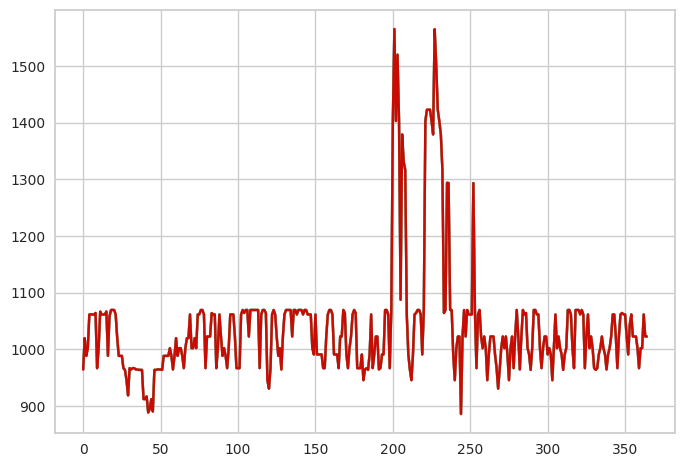

In [106]:
dt[str(col1)].plot(label=f'colum {col1}')
dt[str(col2)].plot(label=f'colum {col2}')
dt[str(col3)].plot(label=f'colum {col3}')

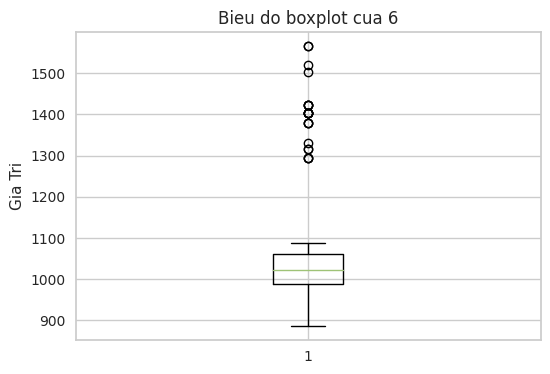

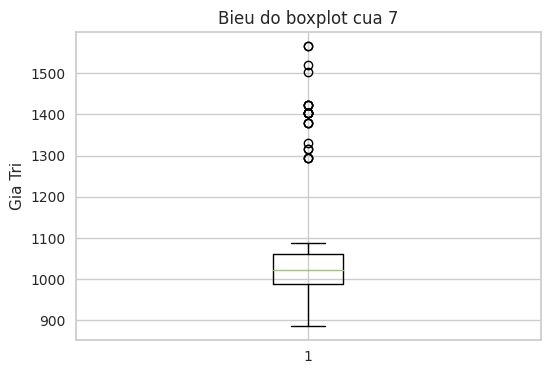

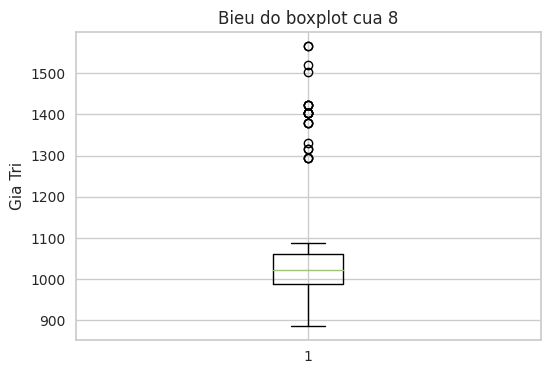

In [107]:
plt.figure(figsize=(6,4))
plt.boxplot(dt[str(col1)])
plt.title(f'Bieu do boxplot cua {col1}')
plt.ylabel('Gia Tri')
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(dt[str(col2)])
plt.title(f'Bieu do boxplot cua {col2}')
plt.ylabel('Gia Tri')
plt.show()

plt.figure(figsize=(6,4))
plt.boxplot(dt[str(col3)])
plt.title(f'Bieu do boxplot cua {col3}')
plt.ylabel('Gia Tri')
plt.show()

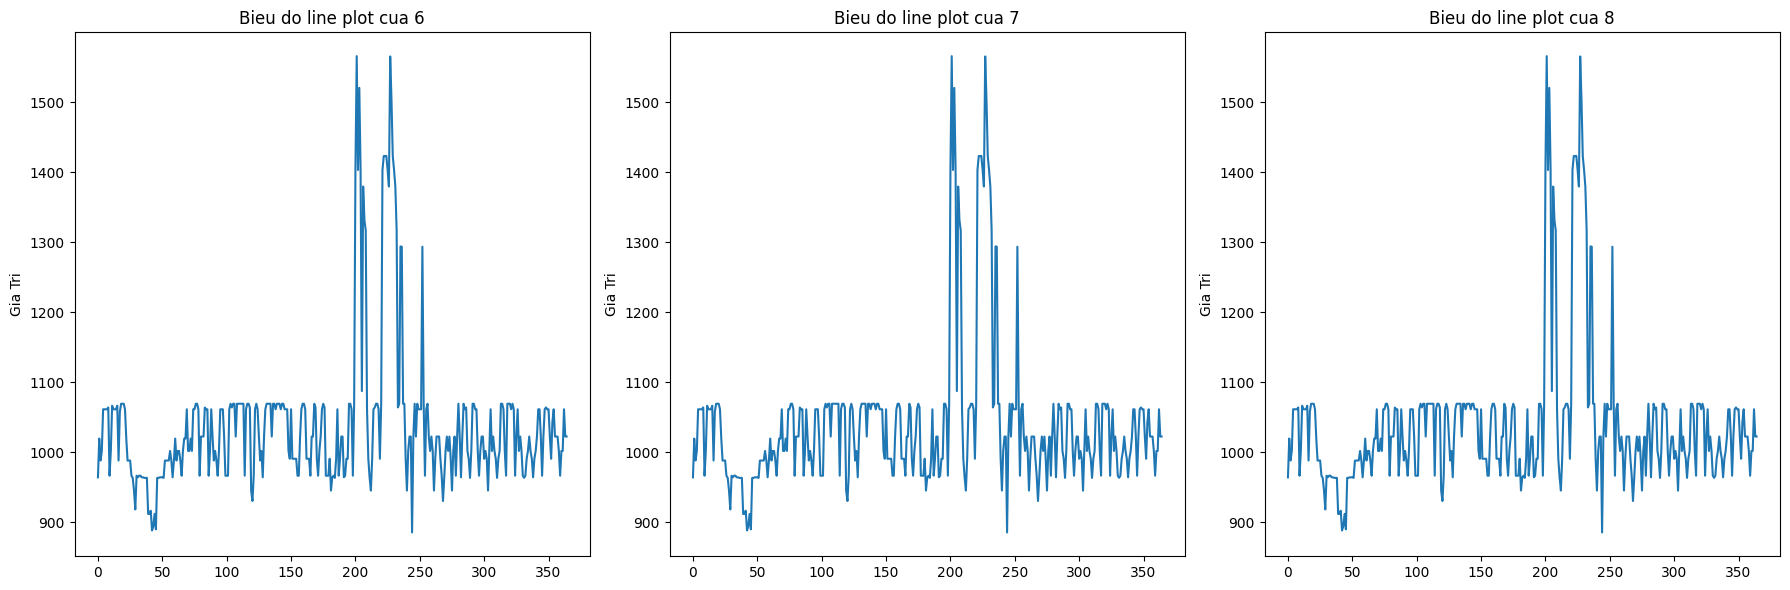

In [90]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  

axs[0].plot(dt[str(col1)])
axs[0].set_title(f'Bieu do line plot cua {str(col1)}')


axs[1].plot(dt[str(col2)])
axs[1].set_title(f'Bieu do line plot cua {str(col2)}')

axs[2].plot(dt[str(col3)])
axs[2].set_title(f'Bieu do line plot cua {str(col3)}')


for ax in axs:
    ax.set_ylabel('Gia Tri')

plt.tight_layout()
plt.show()

In [111]:
col1, col2, col3 = ['5', '6', '7']
# Tạo một DataFrame với các cột đã chọn
selected_columns = [str(col1), str(col2), str(col3)]
dt_corr = dt[selected_columns].corr()

# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(8, 6))
sns.heatmap(dt_corr, annot=True, cmap="crest")
plt.title('Correlation Heatmap')
plt.show()

KeyError: "['5'] not in index"

TÌm cụm tối ưu Kmeans


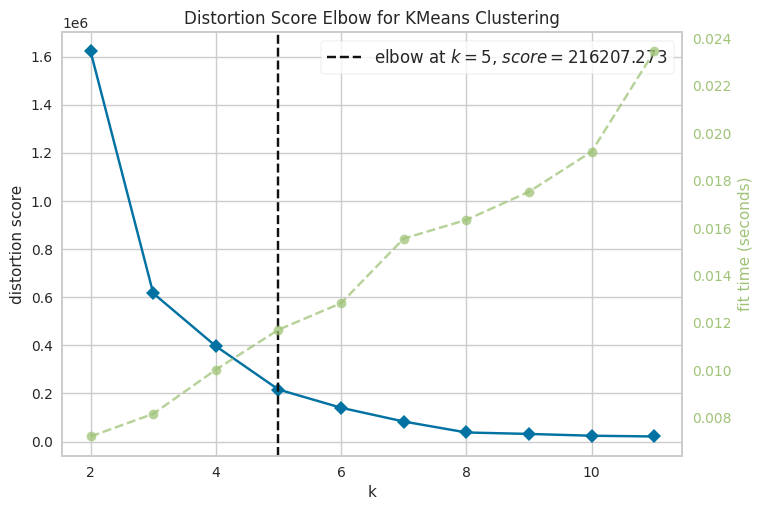

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [92]:
from yellowbrick.cluster import KElbowVisualizer
print('TÌm cụm tối ưu Kmeans')
selected_data_2d = selected_data.values
kmeans = KMeans(random_state=23, n_init=10)
Elbow_M = KElbowVisualizer(kmeans, k=(2, 12))
Elbow_M.fit(selected_data_2d)
Elbow_M.show()

In [93]:
k = 5
# Thực hiện Gaussian Mixture Model
gmm = GaussianMixture(n_components=k) # Số components có thể điều chỉnh
gmm.fit(selected_data.values)
gmm_labels = gmm.predict(selected_data.values)
# Thực hiện KMeans clustering
kmeans = KMeans(n_clusters=k, n_init=10) # Số clusters có thể điều chỉnh
kmeans.fit(selected_data.values)
kmeans_labels = kmeans.predict(selected_data.values)
# Thực hiện DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) # Tham số có thể điều chỉnh
dbscan_labels = dbscan.fit_predict(selected_data.values)
# In ra kết quả của mỗi mô hình
print("Gaussian Mixture Model labels:")
print(gmm_labels)
print("\nKMeans labels:")
print(kmeans_labels)
print("\nDBSCAN labels:")
print(dbscan_labels)
# Mô tả kịch bản tách dữ liệu
print("\nKịch bản tách data:")
print("Dữ liệu được đọc từ tệp CSV 'Gia SMP va SMPcap 2021(Giá thị trường SMP).csv'.")
print(f"Chọn cột số {col1},{col2} để phân tích.")
print(f"Sử dụng Gaussian Mixture Model với số components là {k}, KMeans clustering với số clusters là {k}, và DBSCAN để phân tích dữ liệu.")

Gaussian Mixture Model labels:
[0 0 0 4 3 3 3 3 3 0 0 3 3 3 3 3 0 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 0 0 3 0 0 0 0 0 0 3 3 3 0 0 0 0 3 3 3 3 3 0 3 3 3
 3 3 3 0 3 3 3 3 0 0 0 3 3 3 0 0 0 0 0 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3
 0 0 3 0 0 0 0 0 0 0 3 3 3 3 0 0 0 0 0 0 3 3 0 0 0 0 3 3 3 0 0 0 0 0 0 0 0
 0 3 0 0 0 0 4 0 0 0 3 3 3 0 3 1 1 1 1 1 0 1 1 1 3 0 0 0 0 3 3 3 3 3 0 3 1
 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 3 3 0 0 0 0 0 0 0 3 0 3 3 3 3 1 3 0 3 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 3 3 0 0 0 0 3 3 3 3 0
 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 3 3 0 0 3 3 3 3 3 3 0 0 3 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 3 3 0 0 0 3 3 3 3 0 0 2 3 0 0 0 0 0 0 0 3 0 0]

KMeans labels:
[1 3 3 3 0 0 0 0 0 1 3 0 0 0 0 0 3 0 0 0 0 0 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 1 3 3 3 3 3 3 1 3 3 3 0 3 3 3 3
 0 0 0 0 0 1 3 3 3 0 0 0 1 3 0 3 3 3 3 1 3 0 0 0 3 1 1 1 0 0 0

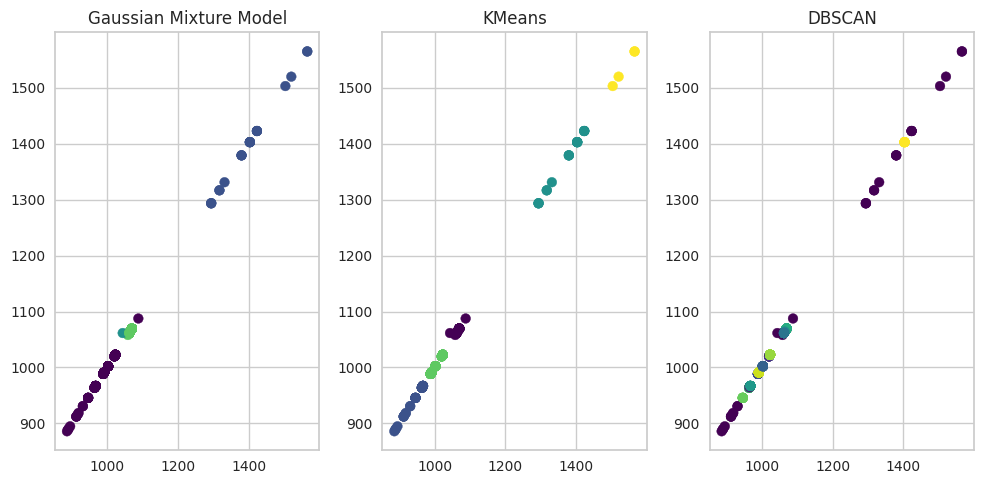

In [94]:
import matplotlib.pyplot as plt
# Biểu đồ Gaussian Mixture Model
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.scatter(selected_data.iloc[:, 0], selected_data.iloc[:, 1], c=gmm_labels, cmap='viridis')
plt.title('Gaussian Mixture Model')
# Biểu đồ KMeans
plt.subplot(1, 3, 2)
plt.scatter(selected_data.iloc[:, 0], selected_data.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans')
# Biểu đồ DBSCAN
plt.subplot(1, 3, 3)
plt.scatter(selected_data.iloc[:, 0], selected_data.iloc[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN')
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `6_kalman` for parameter `y`

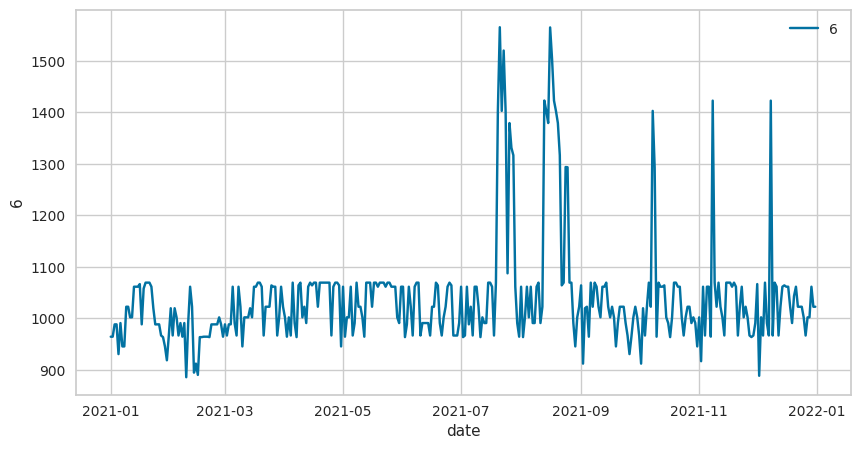

In [109]:
# Khởi tạo bộ lọc Kalman
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)


# Áp dụng bộ lọc Kalman cho từng cột dữ liệu
dt[f'{col1}_kalman'] = kf.smooth(dt[str(col1)].values)[0]
dt[f'{col2}_kalman'] = kf.smooth(dt[str(col2)].values)[0]
dt[f'{col3}_kalman'] = kf.smooth(dt[str(col3)].values)[0]



import numpy as np


# Trực quan hóa kết quả sau khi áp dụng bộ lọc Kalman
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(ax=ax, data=data_8_9, x="date", y=str(col1), label=col1, color ='b')
sns.lineplot(ax=ax, data=data_8_9, x="date", y=f'{col1}_kalman', label=f'{col1}_kalman', color ='r')
plt.title('Data with Kalman Filter')
plt.legend()
plt.grid(True)
plt.show()